In [1]:
from sane import SANEAlgorithm
from sane import Cancer1Dataset
import random
import matplotlib.pyplot as plt
import time

In [2]:
random.seed(1)

Объявляем параметры алгоритма (количество комбинаций, количество нейронов, размер скрытого слоя, количество соединений на нейрон)

In [3]:
algorithm_params = [
    (10, 500, 10, 11), # полносвязная сеть для датасета cancer1 (9 входов, 2 выхода)
    (50, 1000, 9, 8),
    (500, 2000, 20, 8), # большие популяции, расчёт займёт около часа
]

Создаём несколько алгоритмов


In [4]:
algorithms = []
for params in algorithm_params:
    algorithms.append(SANEAlgorithm(
        blueprints_population_size=params[0],
        neuron_population_size=params[1],
        hidden_layer_size=params[2],
        connections_count=params[3]))

Инициализируем алгоритмы

In [5]:
for algorithm in algorithms:
    algorithm.init(
        min_value=-1.0,
        max_value=1.0)

Заргужаем тестовые данные

In [6]:
cancer1_dataset = Cancer1Dataset()
x_train, y_train = cancer1_dataset.get_train_data()

Запускаем алгоритмы

In [7]:
results = []
for algorithm in algorithms:
    start_time = time.time()
    result = algorithm.train(
        generations_count=2000,
        x_train=x_train,
        y_train=y_train)
    results.append(result)
    print("%s seconds" % (time.time() - start_time))

1999/2000 best fitness = 0.17746358127540635, current fitness = 0.24916491231778284

143.38020634651184 seconds
1999/2000 best fitness = 0.1691129250259868, current fitness = 0.216422852457219876

646.3755972385406 seconds
1999/2000 best fitness = 0.11239651200966885, current fitness = 0.17033757292720167

6921.264377593994 seconds


Выводим изменение среднеквадратичной ошибки (приспособленности) лучшей нейронной сети в процессе эволюции

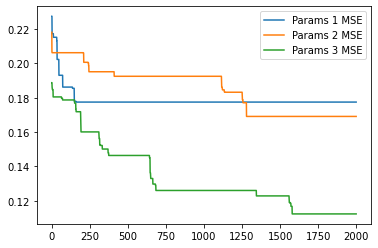

In [8]:
legend = []
for i in range(len(results)):
    plt.plot(results[i])
    legend.append("Params " + str(i+1) + " MSE")
plt.legend(legend)
plt.show()

Загружаем тестовые данные

In [9]:
x_test, y_test = cancer1_dataset.get_test_data()

Пропускаем тестовые данные через лучшие нейросети

In [10]:
results = []
for algorithm in algorithms:
    result = algorithm.test(
        x_test=x_test,
        y_test=y_test)
    results.append(result)

Выводим среднеквадратичную ошибку для каждой тестовой выборки

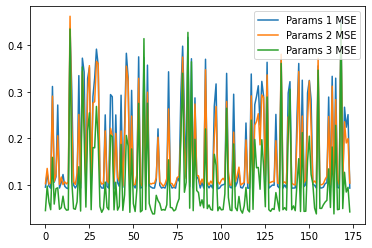

In [11]:
legend = []
for i in range(len(results)):
    plt.plot(results[i])
    legend.append("Params " + str(i+1) + " MSE")
plt.legend(legend)
plt.show()